In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt

In [ ]:
%matplotlib inline

# Probability definitions

In [2]:
def prob_error_digital(snr, n):
    return (1-(1-2*norm.sf(np.sqrt(snr)))**n)/2

In [3]:
def prob_error_analog(snr, n):
    return norm.sf(np.sqrt((1)/(1-(1-(1/snr))**n)))

# Ranges

In [4]:
# range from -5 to 30; step: 1
SNRs_dB = np.arange(-5, 31, 1, dtype=np.float)

In [5]:
# range from 1 to 25; step: 4
Ns = np.arange(1, 26, 4)

In [6]:
SNRs = 10**((SNRs_dB)/10)

# Plot

In [95]:
plt.figure(figsize=(20,10))

### Colors

#jet = plt.get_cmap('gist_ncar')
digital_colors = iter((plt.get_cmap('cool'))(np.linspace(0,1,len(Ns))))
analog_colors = iter((plt.get_cmap('inferno'))(np.linspace(0,1,len(Ns))))

for n in Ns:
    plt.plot(SNRs_dB, prob_error_digital(SNRs, n), 'o-', color=next(digital_colors), label='$Digital; n={}$'.format(n))

for n in Ns:
    plt.plot(SNRs_dB, prob_error_analog(SNRs, n), 's-', color=next(analog_colors), label='$Analog; n={}$'.format(n))

plt.xticks(SNRs_dB)
plt.ylim(ymin=10**-6)
plt.ylim(ymax=10**0)
plt.yscale('log')
plt.legend(loc='best')
plt.xlabel("SNR en dB")
plt.ylabel("Probabilidad de error")
plt.title("Probabilidades de error de sistema analogico y digital")
plt.grid(True)
#plt.show()

## Arrows

In [49]:
prob_error_analog(10**((5)/10),2)

0.15865525393145707

In [97]:
prob_error_digital(10**((6)/10),1)

0.15865525393145707

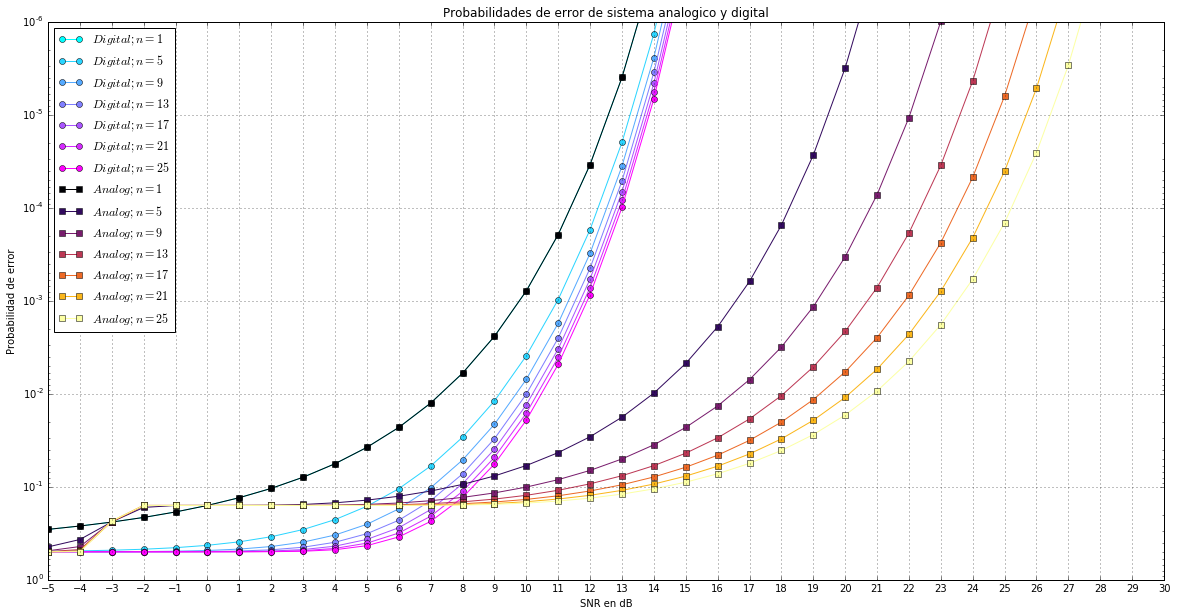

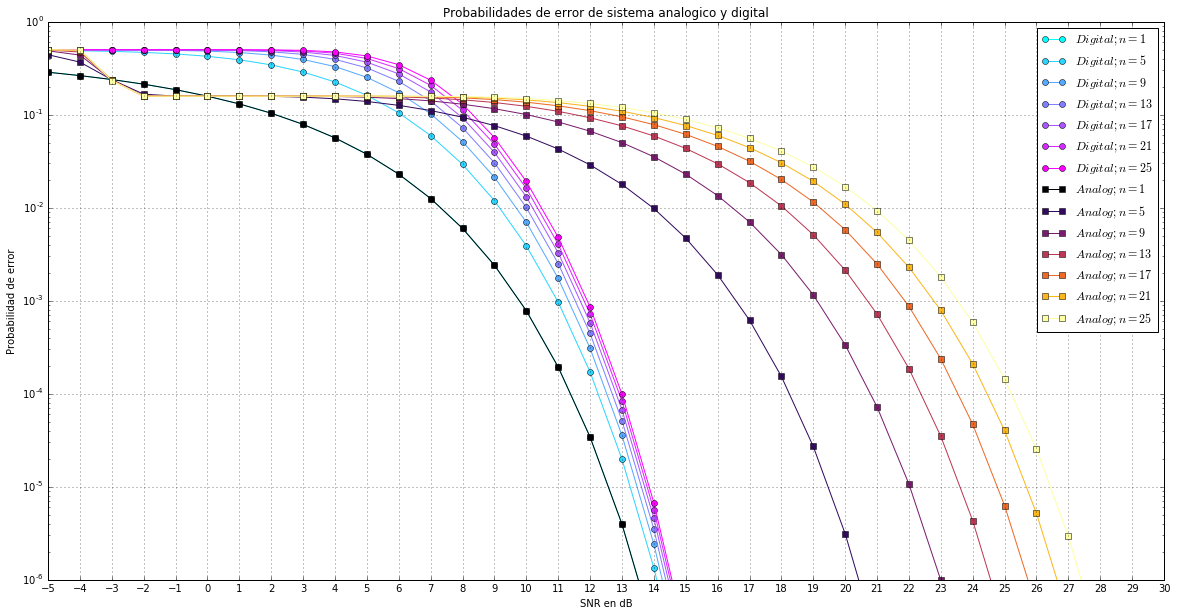

In [96]:
# plt.arrow(5.5, 0.16, 0, -0.12, label="n=5")
# plt.legend(loc='best')
# plt.annotate('n=5', xy=(5.5,0.16),arrowprops=dict(facecolor='black'),)
plt.show()

## Export plot

In [94]:
plt.savefig("Probability_plot.png")